In [106]:
from __future__ import division, print_function, absolute_import
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.signal import find_peaks

In [107]:
def K(x, xi, h):
    return np.exp(-0.5*((x - xi)**2) / (h**2))* (1/(h*np.sqrt(2*np.pi)))

def kde_calc_plot(file_name, width, height, c, lower, upper, nums, num_bins, color_list, hist_input, kde_input, save=False,
                 single_data=False, single_dname=None, plot=True, return_y=False):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)

    if single_data == True:
        new_list = [single_dname]
        color_list = [color_list[0]]
        error_list = [single_dname + ' Error']
    else:
        # Creates a list of the columns in the data frame
        column_list = df.columns.tolist()
        # List comprehension creating a list of the non-error columns in the data frame
        new_list = [column for column in column_list if 'Error' not in column]
        # List comprehension creating a list of the error columns in the data frame
        error_list = [column for column in column_list if 'Error' in column]

    # Provides length of new_list; used later on during plotting
    num_samples = len(new_list)
    counter = 0

    if plot == True:
        fig, ax = plt.subplots(len(new_list), 1, figsize=(width, height))
        plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    # Joins corresponding values in new_list, color_list, and error_list and iterates through them
    for column, the_color, error_col in zip(new_list, color_list, error_list):
        mask = ~np.isnan(df[column]) & ~np.isnan(df[error_col])
        # Eliminates all NaN entries in a specified non-error column of the data frame
        data = df[column][mask]
        # Eliminates all NaN entries in a specified error column of the data frame
        errors = df[error_col][mask]
        # Finds the maximum value of the error values in error_list
        error_max = max(errors)
        # Creates an array of evenly spaced numbers over a specified interval
        x_vals = np.linspace(lower, upper, nums)
        # Returns an all-zero array with the same shape and data type as the input
        total_sum = np.zeros_like(x_vals)
        # Sets up subplots and specifies their size
    
        # Joins corresponding xi and e values in data and errors and iterates through them
        for xi, e in zip(data, errors):
            # Sets the bandwidth (h) equal to the square root of error_max times by a c-value slightly greater than 1
            # squared minus e squared
            h = np.sqrt((c*error_max)**2 - (e)**2)
            # Runs x_vals - xi divided by h through the previously defined KDE function
            # Adds the result of this calculation to the array in total_sum
            total_sum += K(x_vals, xi, h)
        # Completes the KDE function by dividing total_sum by h times the number of data points in the column
        y_vals = total_sum/len(data)

        if plot == True:
            # Plots histogram and KDE
            if hist_input == True and kde_input == True:
                if single_data == True:
                    ax = [ax]
                ax[counter].plot(x_vals, y_vals, color='black')
                
                peaks, _ = find_peaks(y_vals, distance=20)
                ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
                peak_vals = x_vals[peaks].tolist()
                cell_vals = []

                for val in peak_vals:
                    new_val = round(val)
                    cell_vals.append(new_val)
                    
                for val1, val2, val3 in zip(cell_vals, x_vals[peaks], y_vals[peaks]):
                    ax[counter].annotate(f'{val1}', (val2, val3))
                    
                ax[counter].hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
                ax[counter].text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
                
            # Plots only KDE
            elif kde_input == True:
                if single_data == True:
                    ax = [ax]
                ax[counter].plot(x_vals, y_vals, color=the_color)
                
                peaks, _ = find_peaks(y_vals, distance = 20)
                ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
                peak_vals = x_vals[peaks].tolist()
                cell_vals = []
                
                for val in peak_vals:
                    new_val = round(val)
                    cell_vals.append(new_val)
                    
                for val1, val2, val3 in zip(cell_vals, x_vals[peaks], y_vals[peaks]):
                    ax[counter].annotate(f'{val1}', (val2, val3))
                
                ax[counter].text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
            
            # Plots only histogram
            elif hist_input == True:
                if single_data == True:
                    ax = [ax]
                ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
                ax.text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
            
            counter += 1
            
    # Labels x-axis
    if plot == True:
        plt.xlabel('Age (Ma)')
        
    # Saves final graphs as pngs
    if save == True:
        print('working')
        plt.savefig('c-'+str(c).split('.')[1]+'.png', dpi=400, bbox_inches='tight')

    # Shows final graphs
    plt.show()

    if return_y == True:
        return y_vals

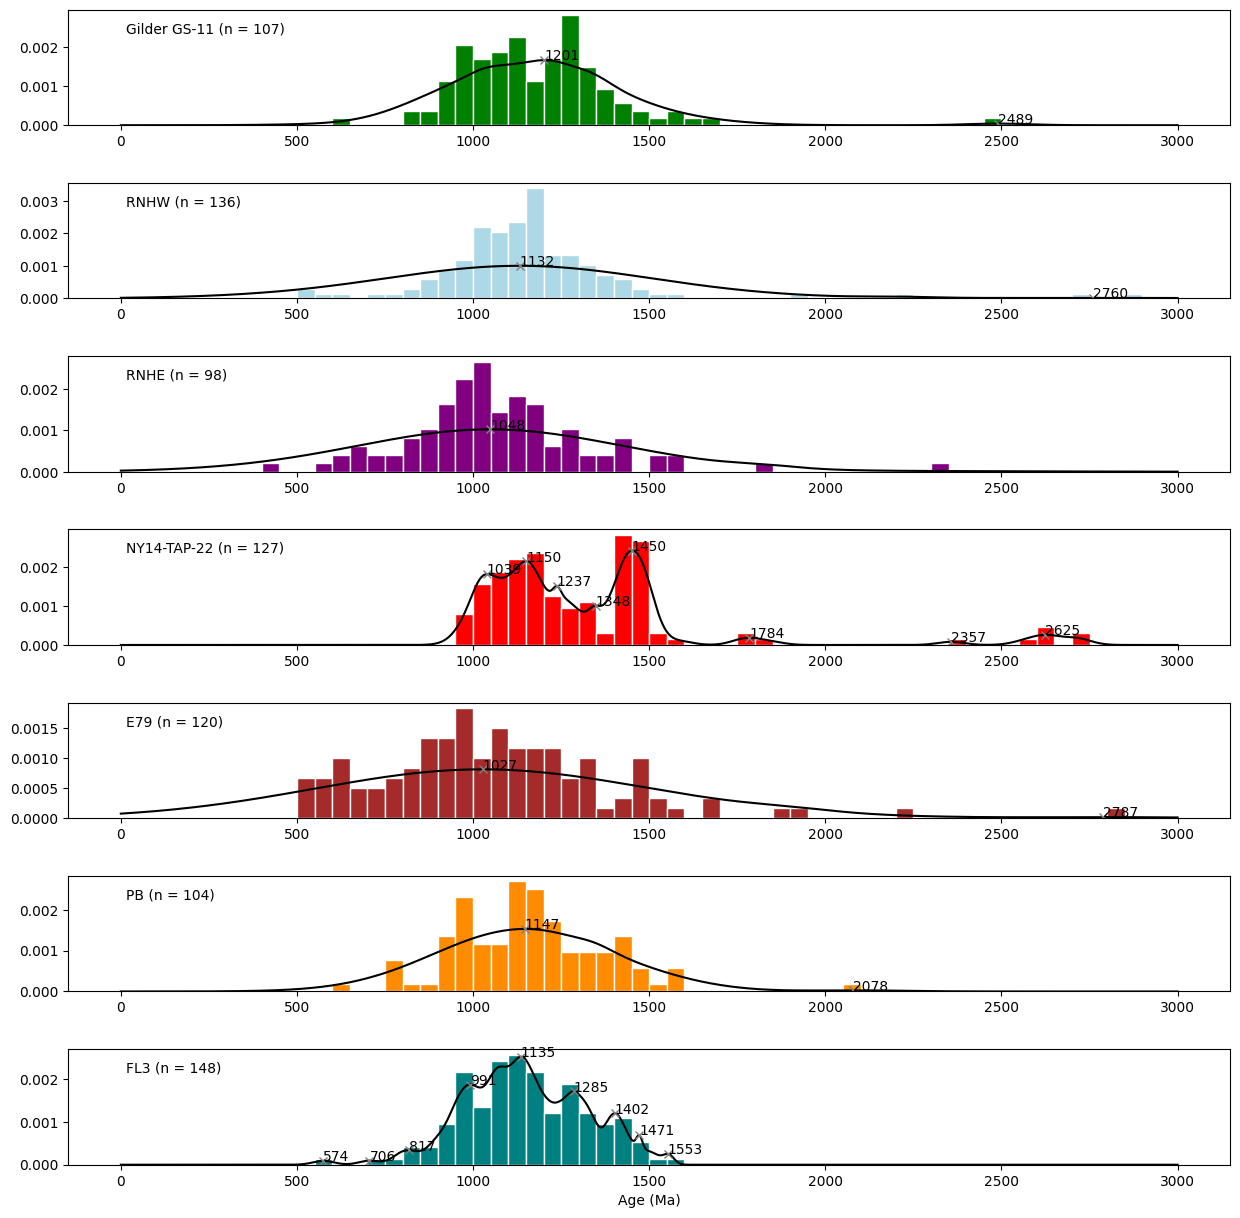

array([2.79807417e-086, 1.97708705e-085, 1.38275729e-084, 9.57237532e-084,
       6.55914268e-083, 4.44864791e-082, 2.98650048e-081, 1.98449834e-080,
       1.30524636e-079, 8.49743470e-079, 5.47566385e-078, 3.49252336e-077,
       2.20493331e-076, 1.37786032e-075, 8.52252974e-075, 5.21777629e-074,
       3.16195716e-073, 1.89661904e-072, 1.12605040e-071, 6.61742681e-071,
       3.84923178e-070, 2.21621850e-069, 1.26300389e-068, 7.12443444e-068,
       3.97786188e-067, 2.19837918e-066, 1.20256650e-065, 6.51132239e-065,
       3.48965821e-064, 1.85118654e-063, 9.72010762e-063, 5.05179315e-062,
       2.59880470e-061, 1.32329089e-060, 6.66945891e-060, 3.32720436e-059,
       1.64294093e-058, 8.03004573e-058, 3.88479124e-057, 1.86024844e-056,
       8.81714151e-056, 4.13654992e-055, 1.92088925e-054, 8.82917203e-054,
       4.01690194e-053, 1.80890632e-052, 8.06296032e-052, 3.55734974e-051,
       1.55350339e-050, 6.71508387e-050, 2.87305722e-049, 1.21672017e-048,
       5.10024144e-048, 2

In [108]:
kde_calc_plot('ForAgeCalc.xlsx', 15, 15, 1.04, 0, 3000, 1000, 50, 
              ['green', 'lightblue', 'purple', 'red', 'brown', 'darkorange', 'teal'], 
              True, True, False, False, None, True, True)

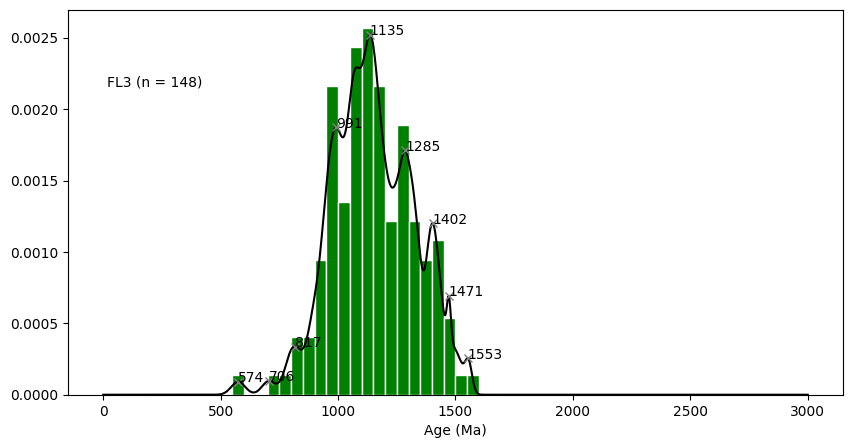

In [109]:
kde_calc_plot('ForAgeCalc.xlsx', 10, 5, 1.04, 0, 3000, 1000, 50, 
              ['green', 'lightblue', 'purple', 'red', 'brown', 'darkorange', 'teal'], 
              True, True, False, True, 'FL3', True, False)

In [110]:
kde_calc_plot('ForAgeCalc.xlsx', 10, 5, 1.04, 0, 3000, 1000, 50, 
              ['green', 'lightblue', 'purple', 'red', 'brown', 'darkorange', 'teal'], 
              True, True, False, True, 'FL3', False, False)

In [104]:
def K(x, xi, h):
    return np.exp(-0.5*((x - xi)**2) / (h**2))* (1/(h*np.sqrt(2*np.pi)))

def kde_calc_man(file_name, width, height, c, lower, upper, nums, num_bins, color_list, hist_input, kde_input, save=False, 
                 single_data=False, single_dname=None, plot=True):
    
    df = pd.read_excel(file_name)# Creates a pandas data frame from an excel file and a specified column
    
    if single_data == True:
        new_list = [single_dname]
        color_list = [color_list[0]]
        error_list = [single_dname + ' Error']
    else:
        # Creates a list of the columns in the data frame
        column_list = df.columns.tolist()
        # List comprehension creating a list of the non-error columns in the data frame
        new_list = [column for column in column_list if 'Error' not in column]
        # List comprehension creating a list of the error columns in the data frame
        error_list = [column for column in column_list if 'Error' in column]
    
    # Provides length of new_list; used later on during plotting
    num_samples = len(new_list)
    counter = 0

    if plot == True:
        fig, ax = plt.subplots(len(new_list), 1, figsize=(width, height))
    
    # Joins corresponding values in new_list, color_list, and error_list and iterates through them
    for column, the_color, error_col in zip(new_list, color_list, error_list):
        mask = ~np.isnan(df[column]) & ~np.isnan(df[error_col])
        # Eliminates all NaN entries in a specified non-error column of the data frame
        data = df[column][mask]
        # Eliminates all NaN entries in a specified error column of the data frame
        errors = df[error_col][mask]
        # Finds the maximum value of the error values in error_list
        error_max = max(errors)
        # Creates an array of evenly spaced numbers over a specified interval
        x_vals = np.linspace(lower, upper, nums)
        # Returns an all-zero array with the same shape and data type as the input
        total_sum = np.zeros_like(x_vals)
        # Sets up subplots and specifies their size
    
        # Joins corresponding xi and e values in data and errors and iterates through them
        for xi, e in zip(data, errors):
            # Sets the bandwidth (h) equal to the square root of error_max times by a c-value slightly greater than 1
            # squared minus e squared
            h = np.sqrt((c*error_max)**2 - (e)**2)
            # Runs x_vals - xi divided by h through the previously defined KDE function
            # Adds the result of this calculation to the array in total_sum
            total_sum += K(x_vals, xi, h)
        # Completes the KDE function by dividing total_sum by h times the number of data points in the column
        y_vals = total_sum/len(data)
        
        if plot == True:
            #fig, ax = plt.subplots(len(new_list), 1, figsize=(width, height))
            
            # Plots histogram and KDE
            if hist_input == True and kde_input == True:
                if single_data == True:
                    ax = [ax]
                ax[counter].plot(x_vals, y_vals, color='black')
                peaks, _ = find_peaks(y_vals, distance=20)
                ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
                
                cell_vals     = [x_vals[peaks].tolist()]
                column_lables = ['Peak #'+str(i+1) for i in range(np.shape(cell_vals)[1])]
                ax[counter].table(cellText=cell_vals, colLabels=column_lables,loc='right', cellLoc='center')
        
                ax[counter].hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
                ax[counter].set_title(column + ' (n = ' + str(len(data)) + ')', x=width/11.5, y=height/13, fontsize = 10)
            
            # Plots only KDE
            elif kde_input == True:
                ax[counter].plot(x_vals, y_vals, color=the_color)
                peaks, _ = find_peaks(y_vals, distance = 20)
                ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
                ax[counter].set_title(column + ' (n = ' + str(len(data)) + ')', x=width/11.5, y=height/13, fontsize = 10)
            
            # Plots only histogram
            elif hist_input == True:
                ax[counter].hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
                ax[counter].set_title(column + ' (n = ' + str(len(data)) + ')', x=width/11.5, y=height/13, fontsize = 10)

            counter += 1

            # Labels x-axis
            plt.xlabel('Age (Ma)')
            # Shows final graphs
            plt.show()

    # Saves final graphs as pngs
    if save == True:
        print('working')
        plt.savefig('c-'+str(c).split('.')[1]+'.png', dpi=400, bbox_inches='tight')

    return y_vals

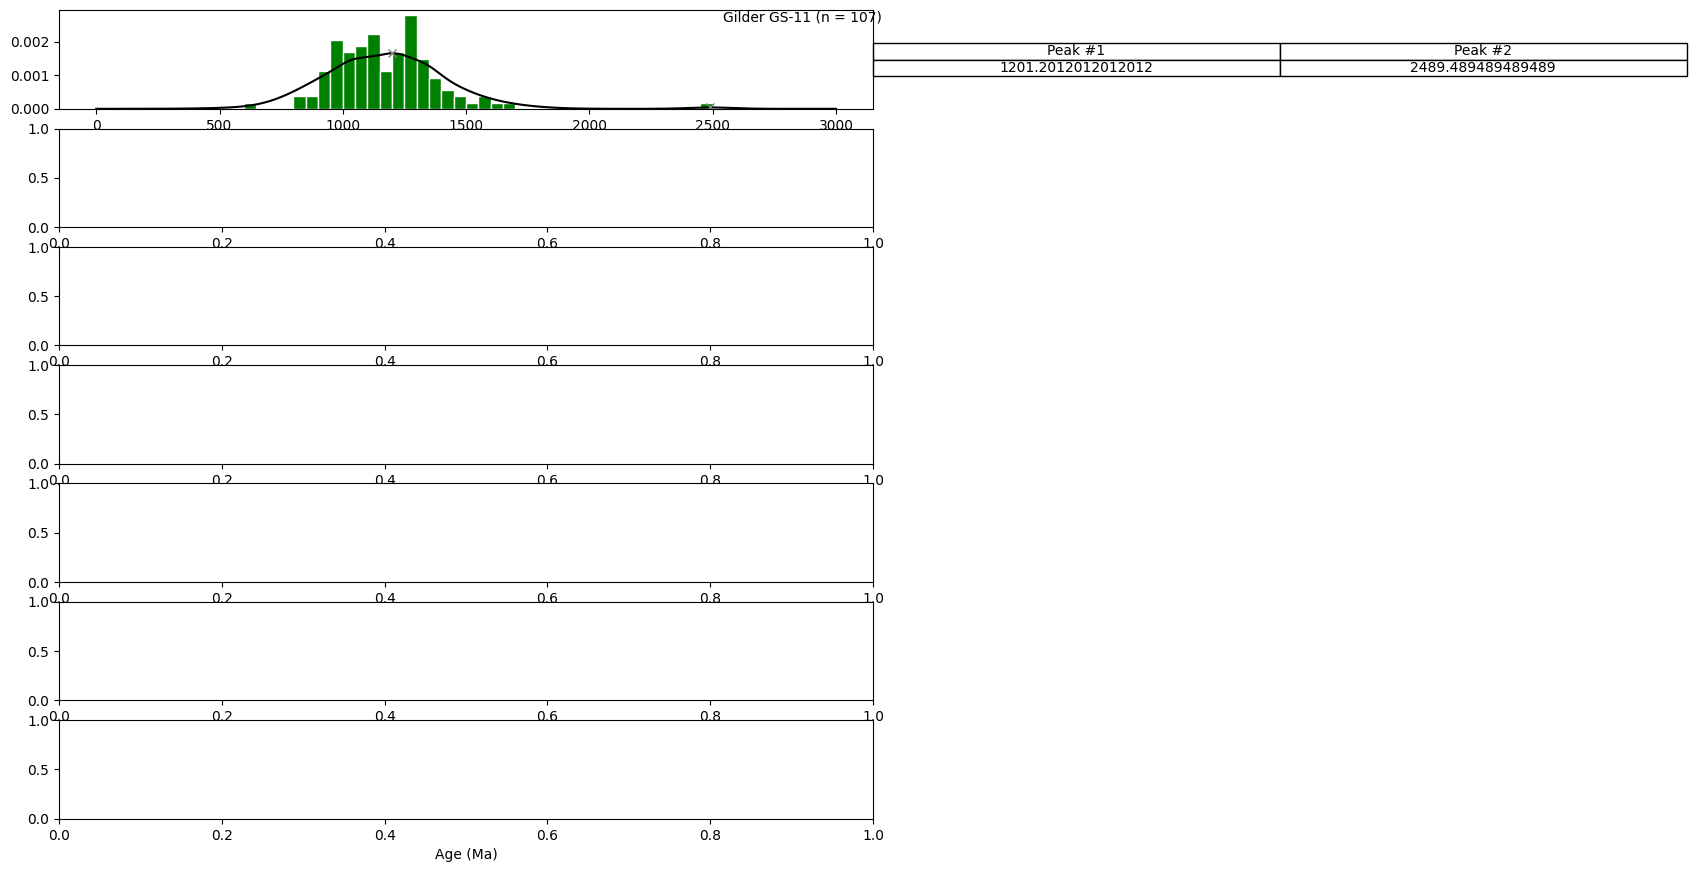

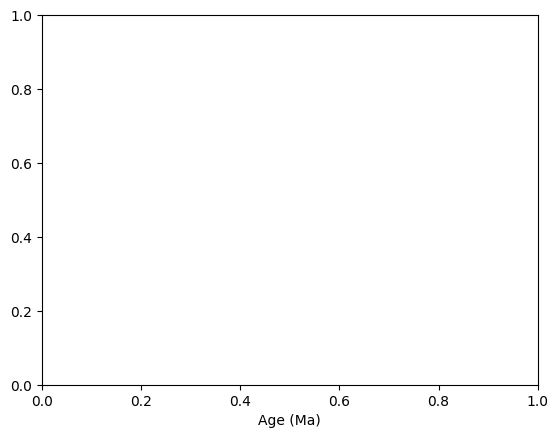

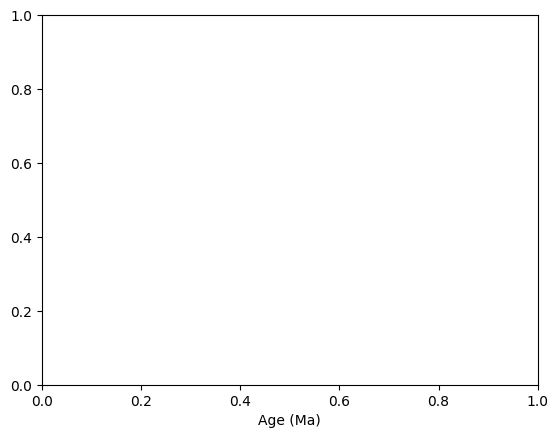

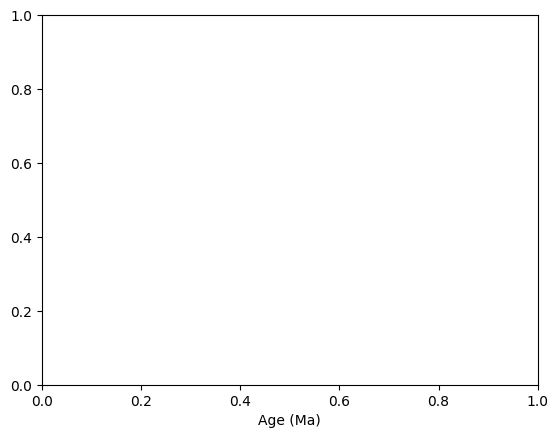

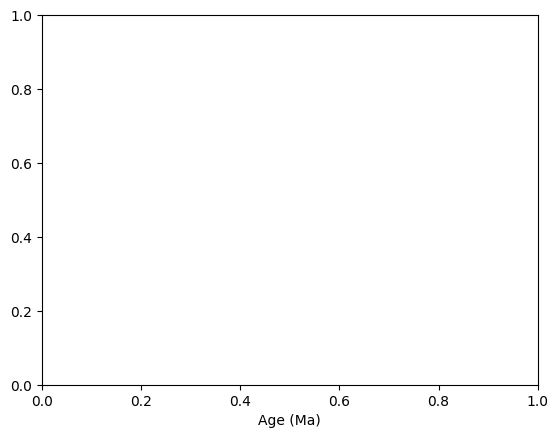

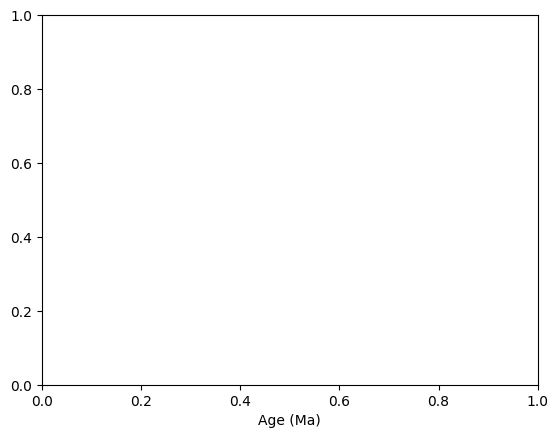

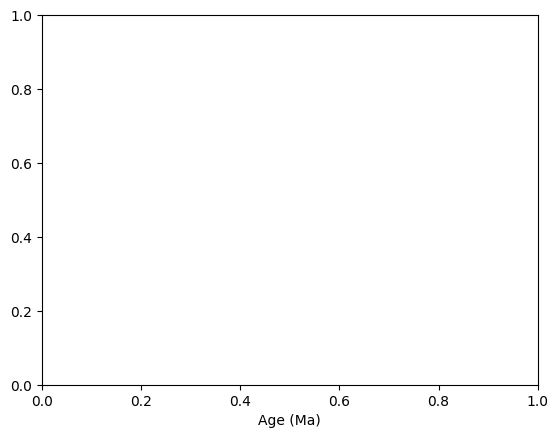

In [105]:
test = kde_calc_man('ForAgeCalc.xlsx', 10.5, 10.5, 1.04, 0, 3000, 1000, 50, 
             ['green', 'navy', 'purple', 'red', 'brown', 'darkorange', 'teal'], True, True, single_data=False, single_dname=None, plot=True)

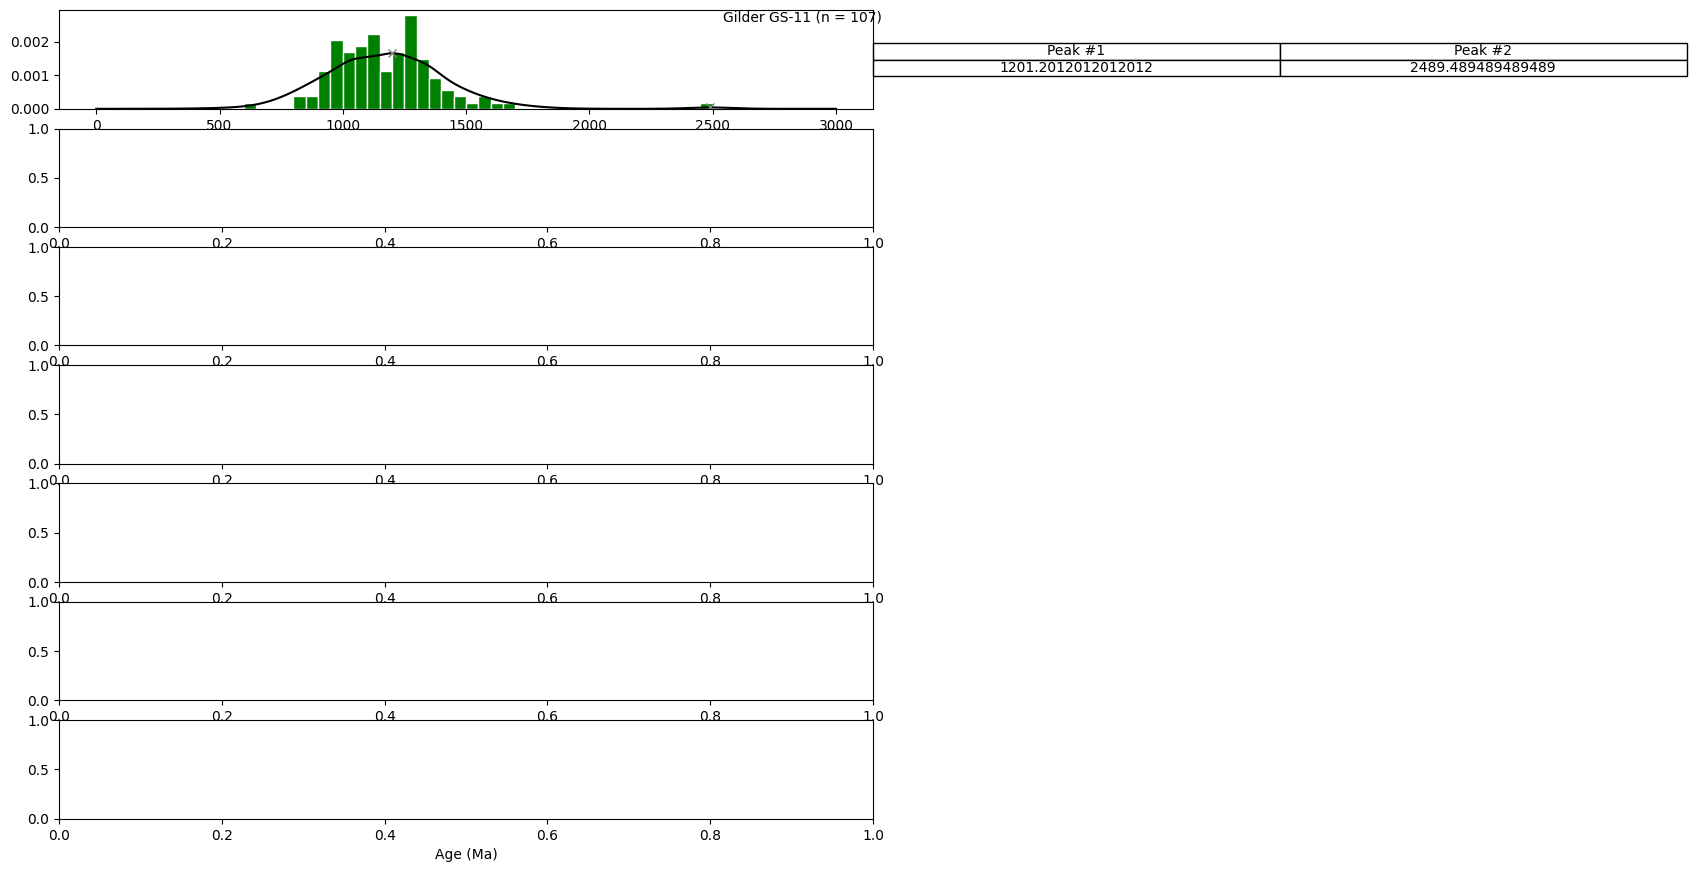

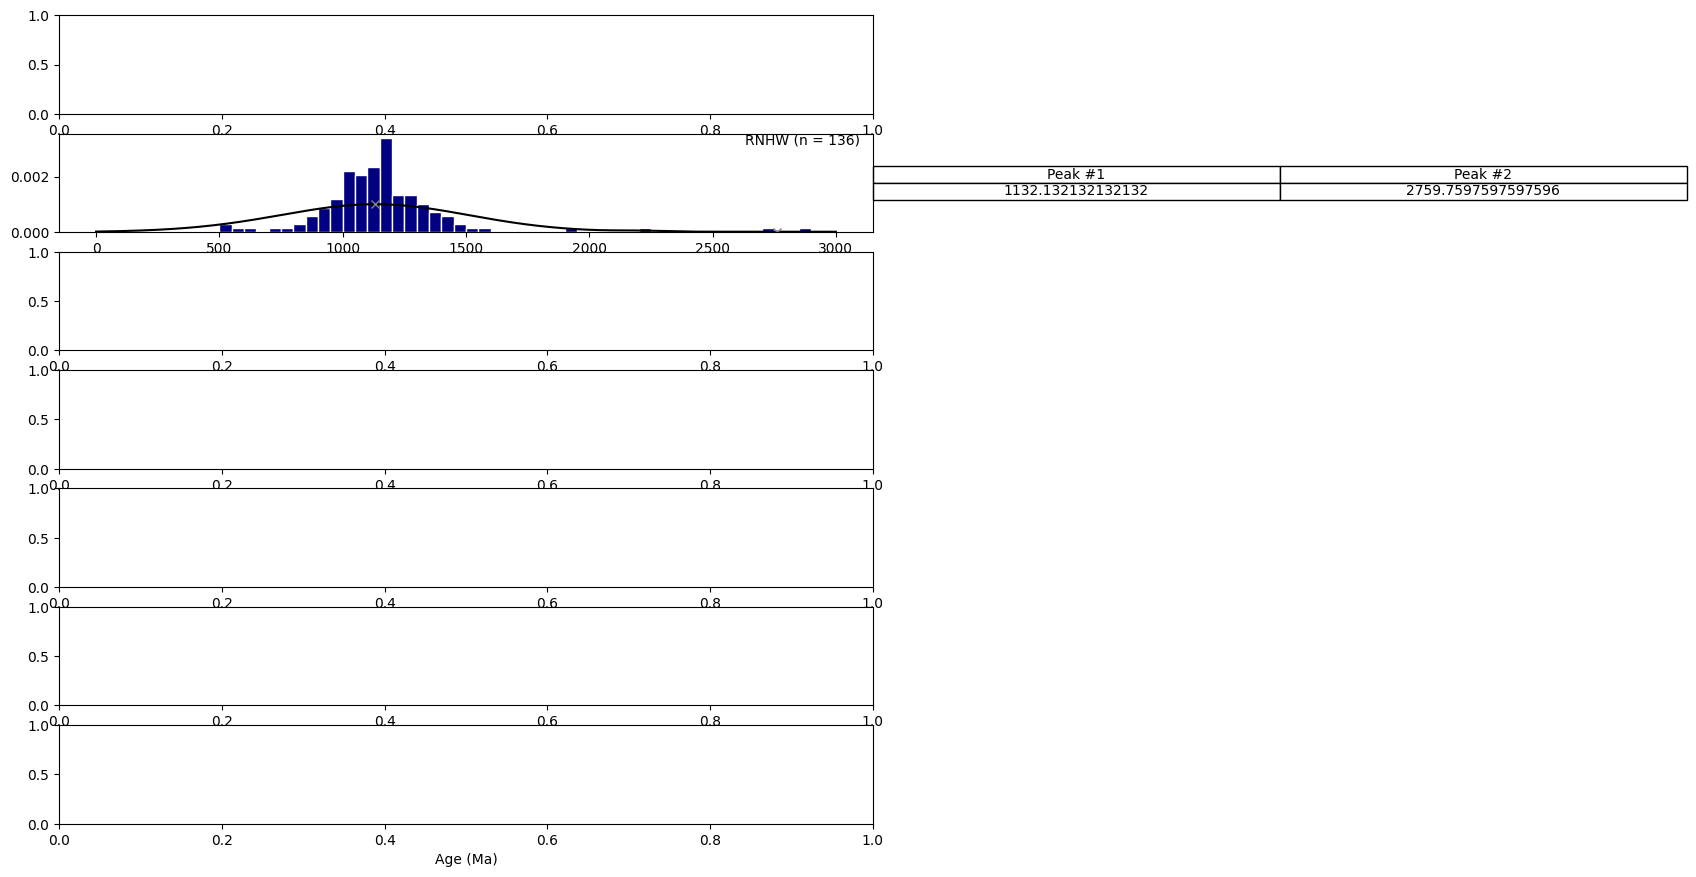

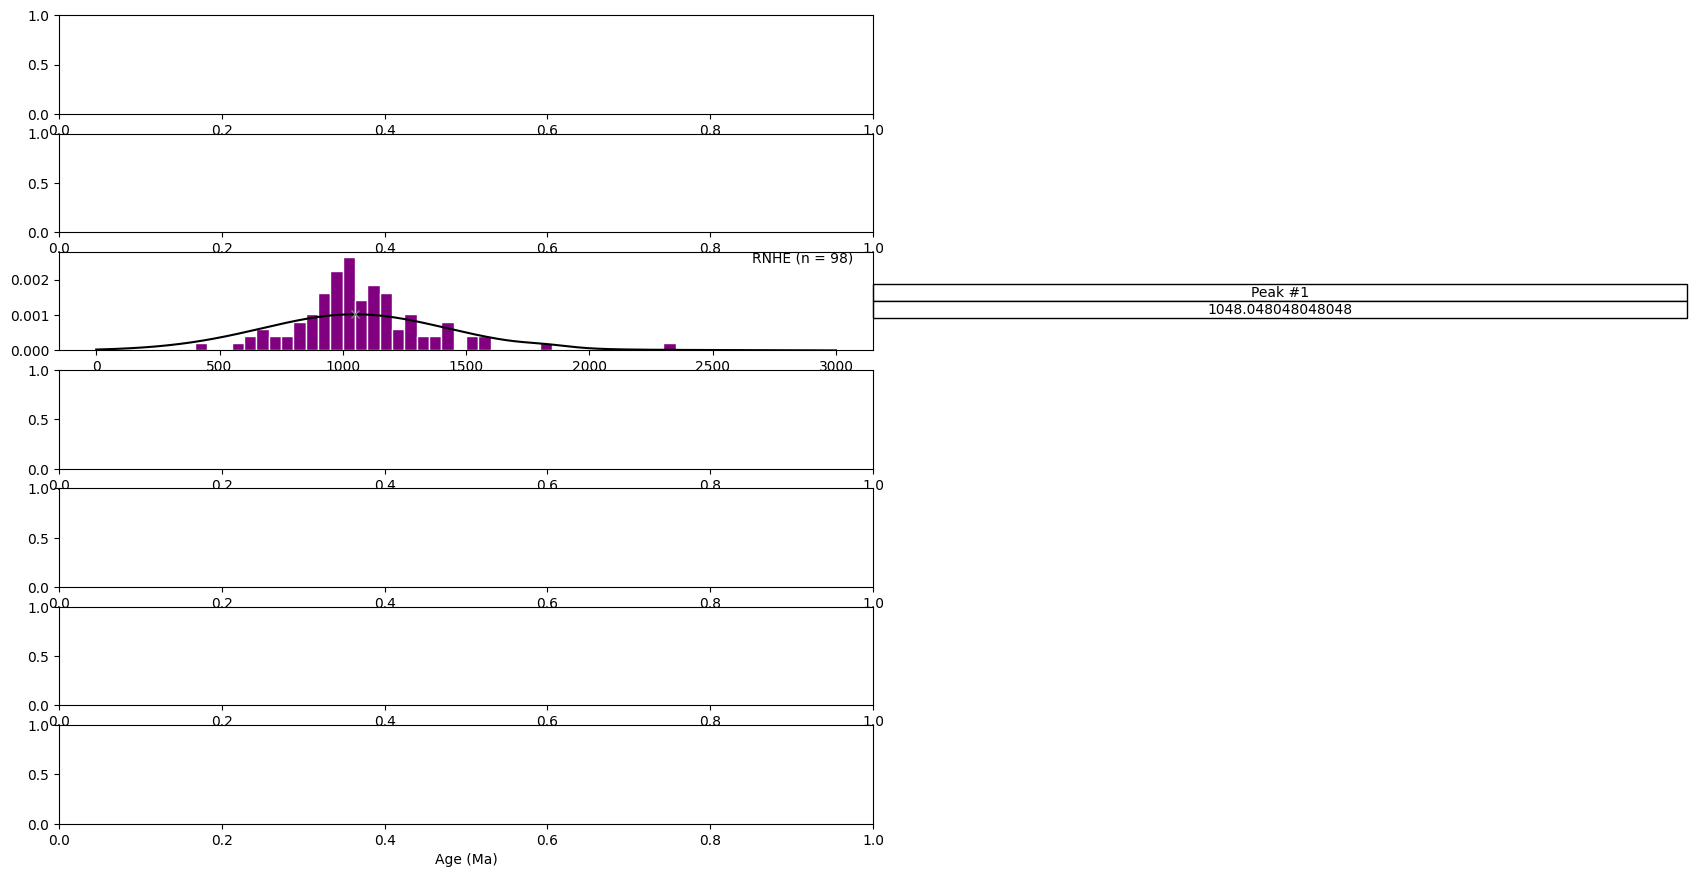

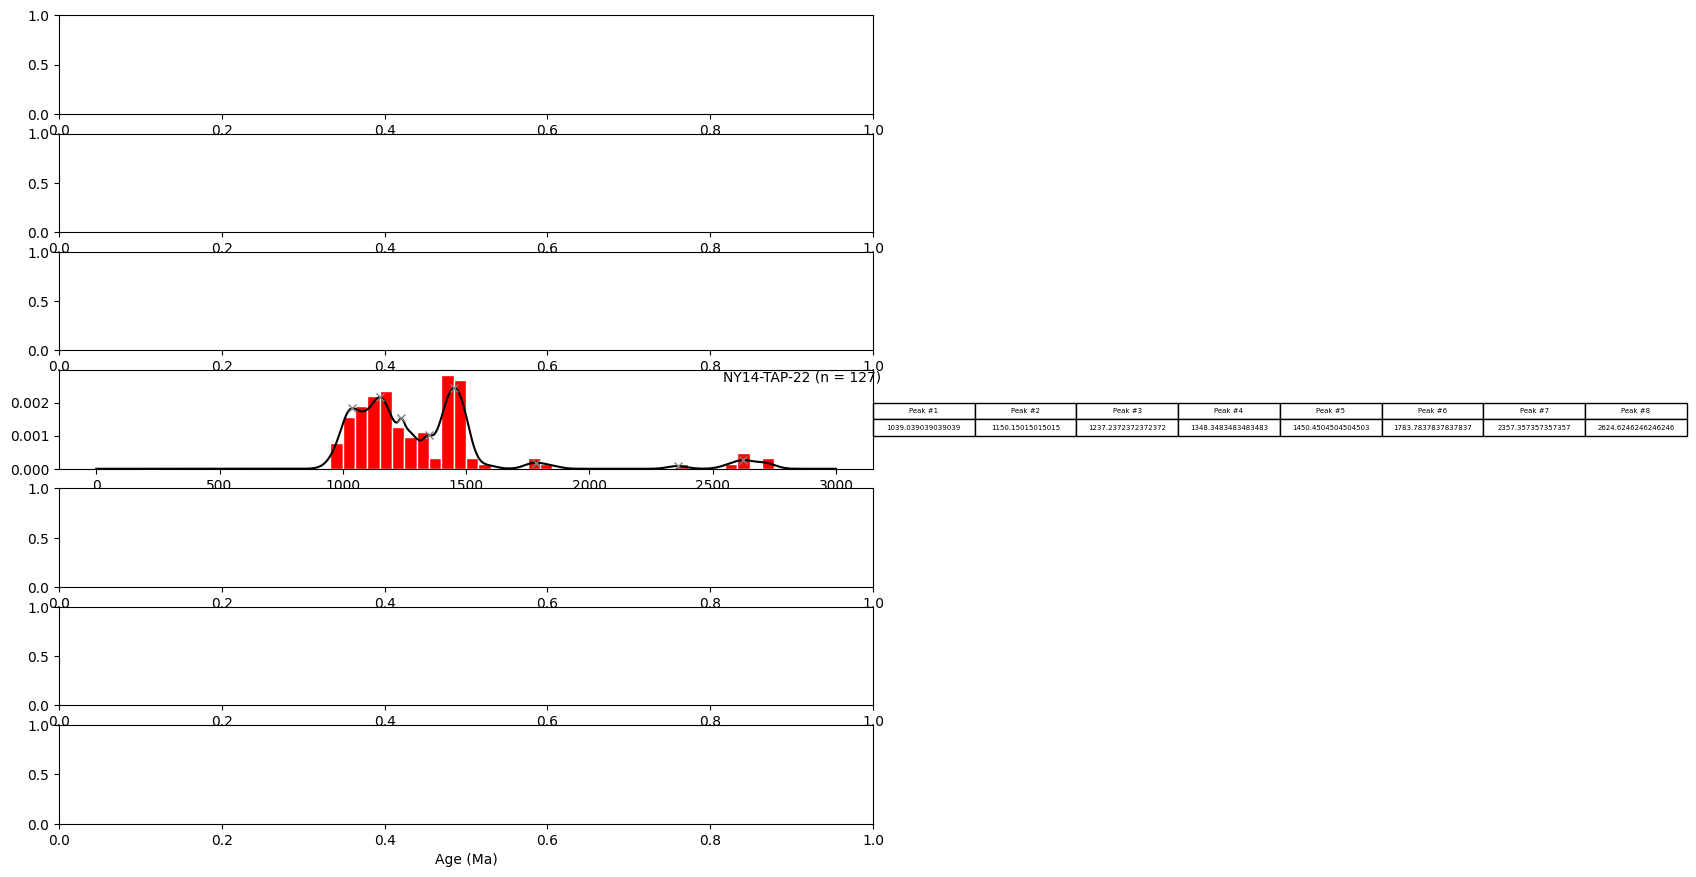

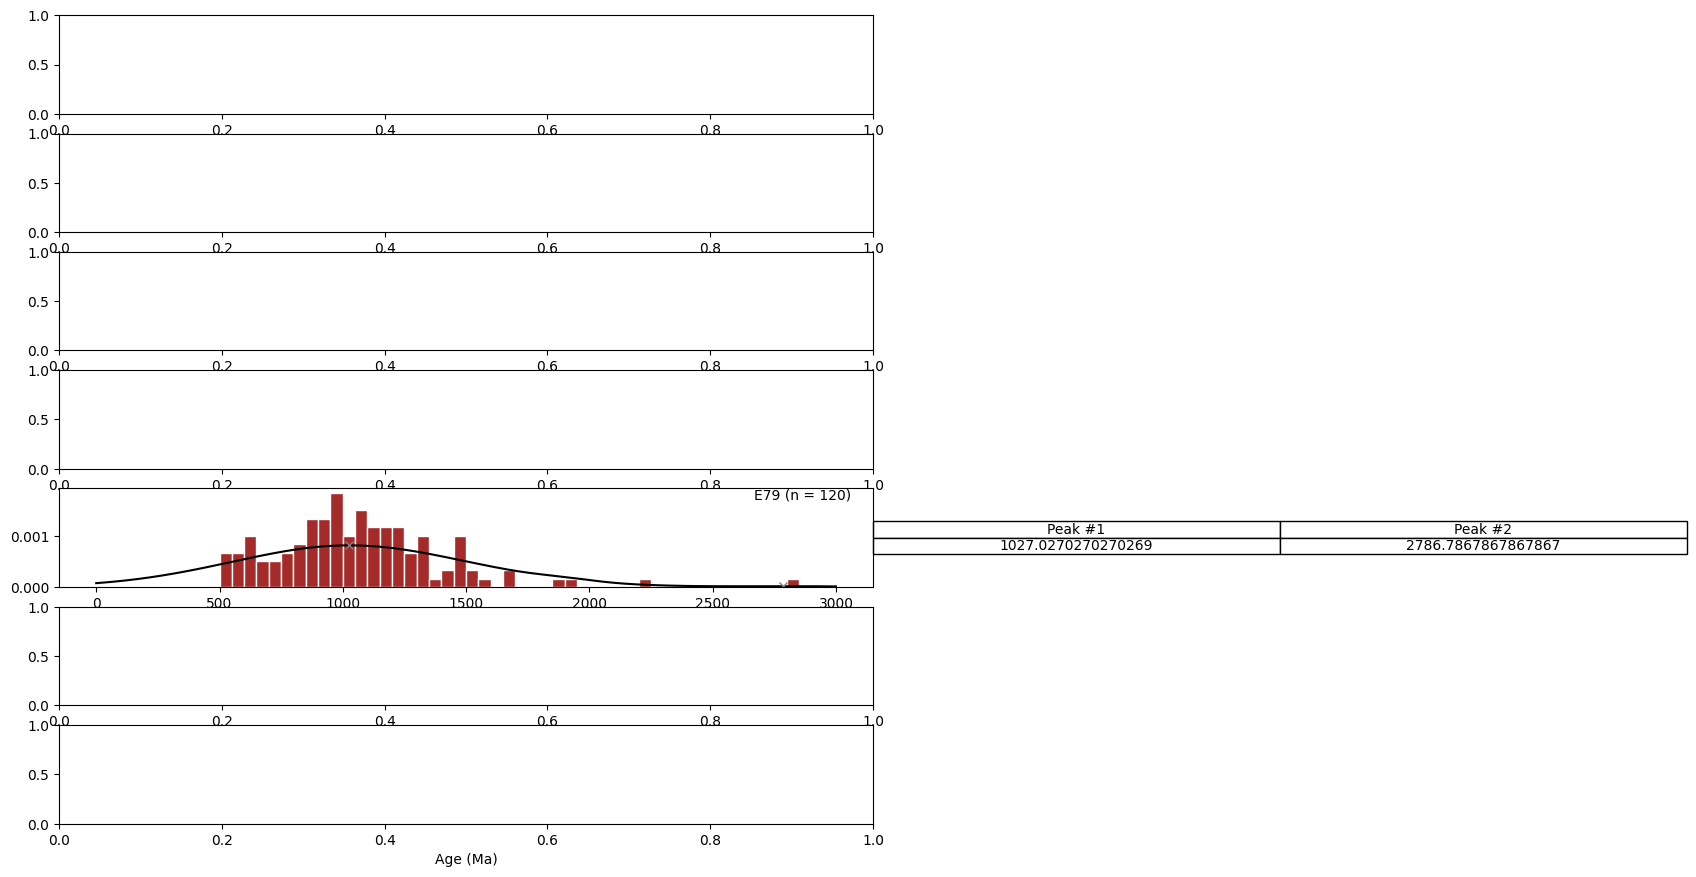

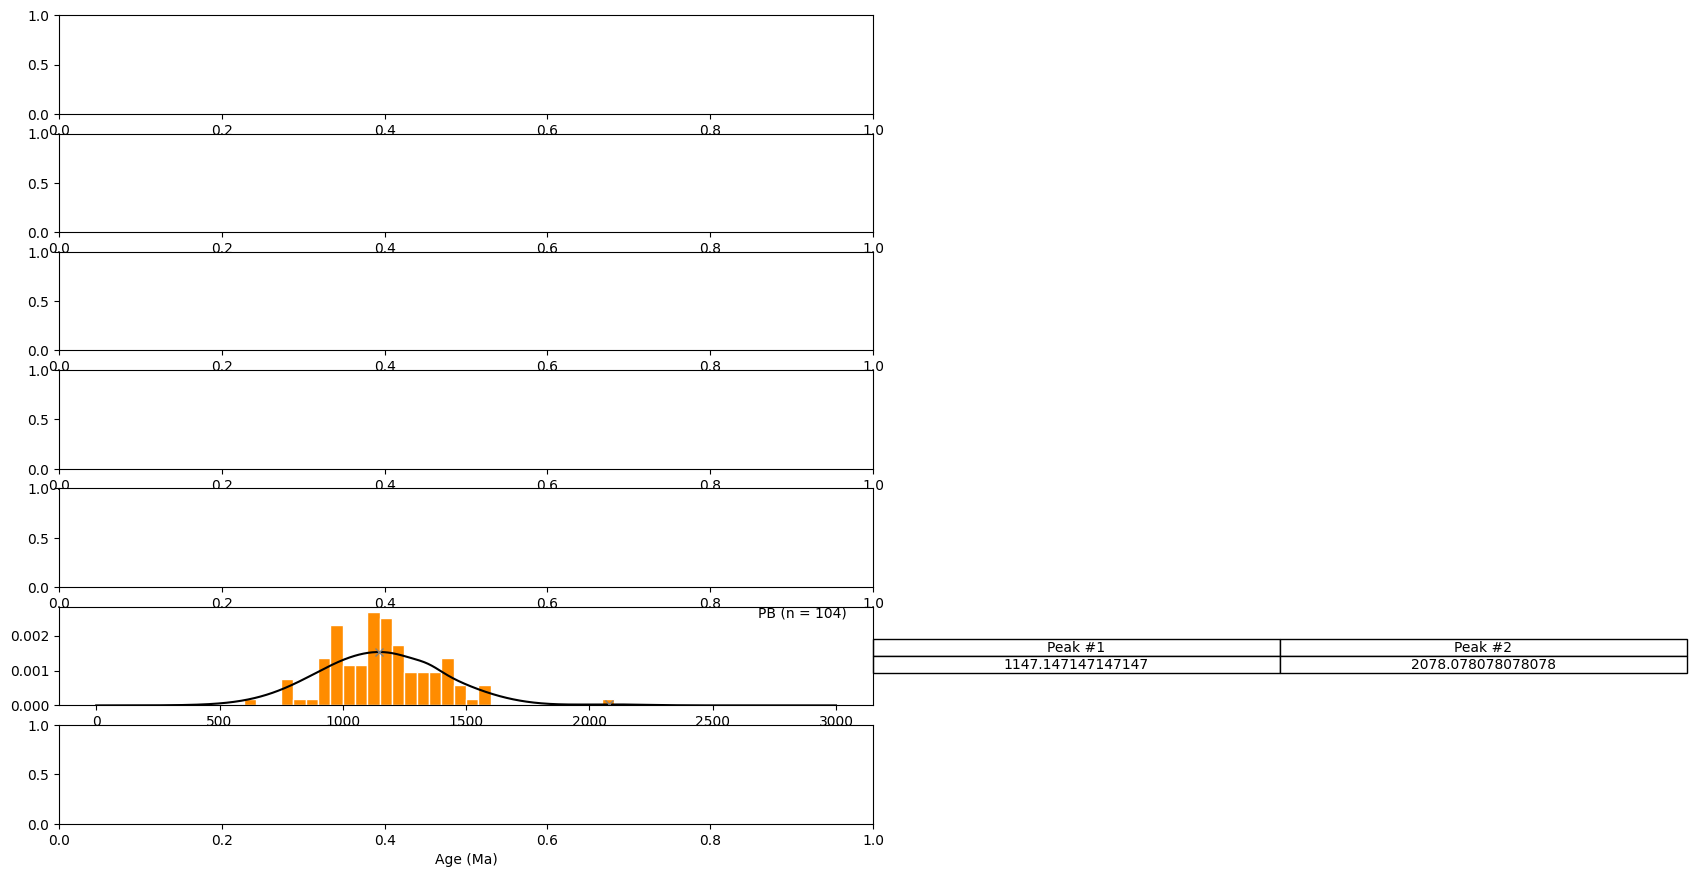

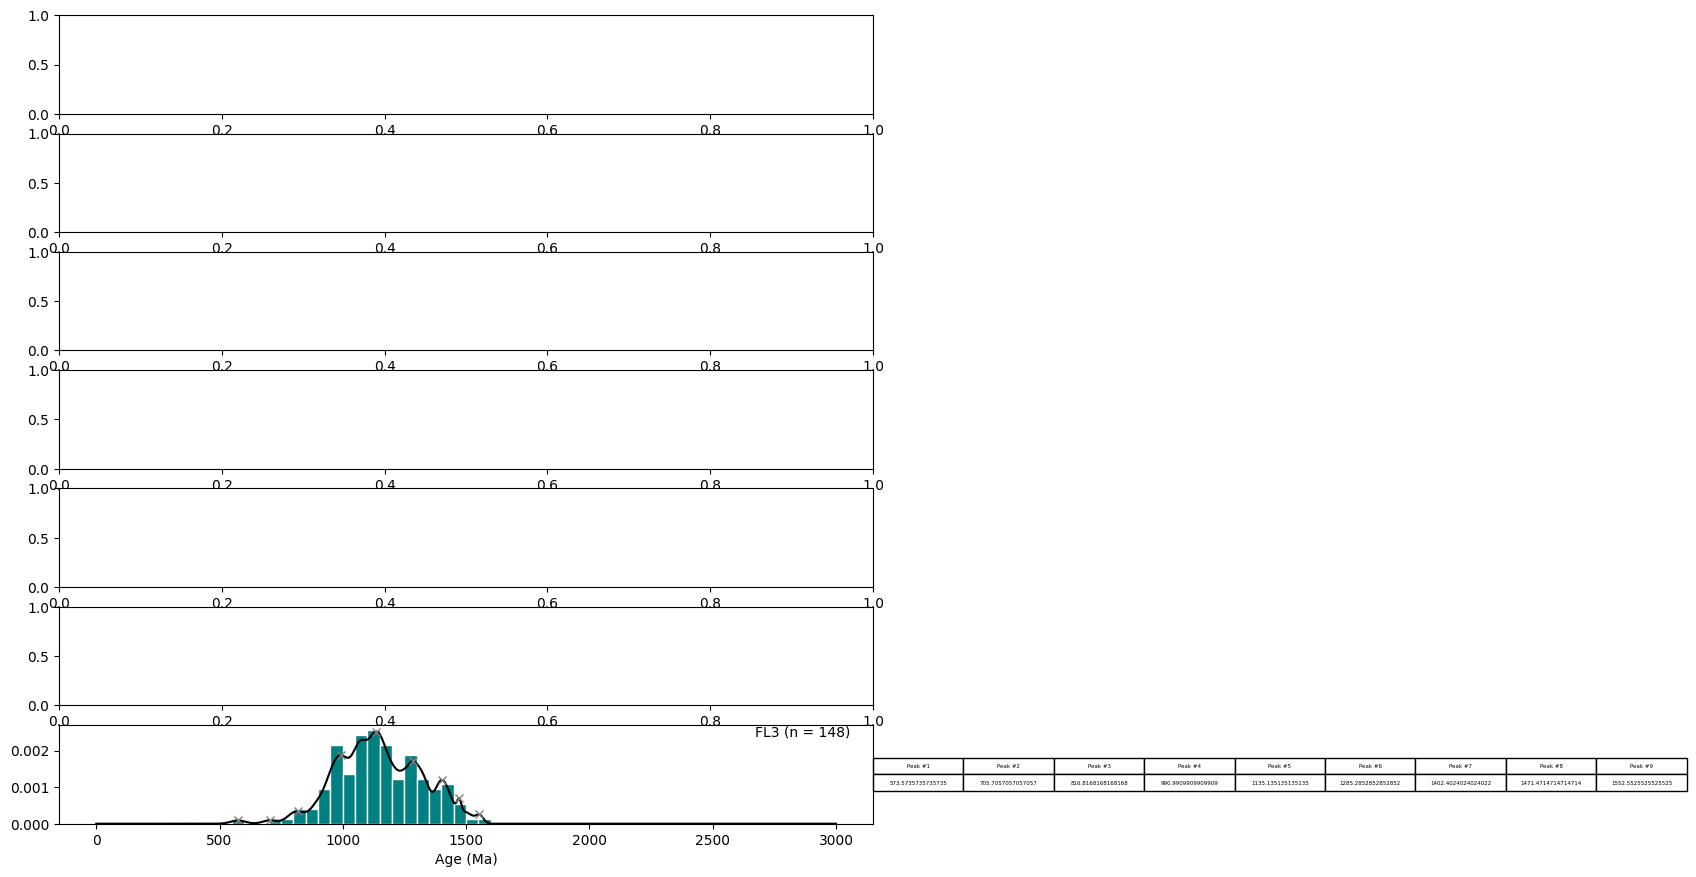

In [63]:
test = kde_calc_man('ForAgeCalc.xlsx', 10.5, 10.5, 1.04, 0, 3000, 1000, 50, ['green', 'navy', 'purple', 'red', 'brown', 'darkorange', 'teal'], True, True)